***Amin fathi 4007 22102***

# **Data pre-processing**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os, os.path
from os import listdir
############################333
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications import ResNet50 , VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
###################################################
import keras
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten , AveragePooling2D ,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
###################################################
import random
from os import listdir
import pandas as pd
from numpy import asarray
from numpy import save
import numpy as np
from numpy import load
###################################################
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.base import clone
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
################################################
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import pyplot
from matplotlib.image import imread

In [7]:
!gdown --id 115qW02YXuMsI7cd1iqplrWa76M525D64
!gdown --id 1SopN4x3VcRk6lKpKh6VCWPZaxzvv-lxh

Downloading...
From: https://drive.google.com/uc?id=115qW02YXuMsI7cd1iqplrWa76M525D64
To: /content/Cat.zip
100% 43.7M/43.7M [00:00<00:00, 51.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1SopN4x3VcRk6lKpKh6VCWPZaxzvv-lxh
To: /content/Dog.zip
100% 51.7M/51.7M [00:00<00:00, 79.6MB/s]


In [ ]:
!unzip Cat.zip
!unzip Dog.zip

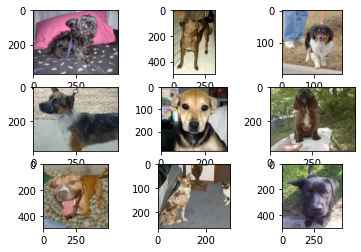

In [9]:
# plot dog photos from the dogs vs cats dataset
# define location of dataset
folder = 'trainfolder/Dog/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder +  str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

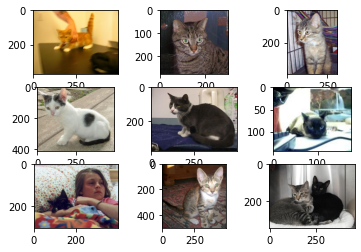

In [10]:
# plot dog photos from the dogs vs cats dataset
# define location of dataset
folder = 'trainfolder/Cat/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder +  str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [11]:
# load dogs vs cats dataset, reshape and save to a new file
# define location of dataset
folder = 'trainfolder/Cat/'
photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):
	# determine class
	output = 1.0
	# load image
	photo = load_img(folder + file, target_size=(224, 224))
	# convert to numpy array
	photo = img_to_array(photo)
	# store
	photos.append(photo)
	labels.append(output)


In [12]:
# define location of dataset
folder2 = 'trainfolder/Dog/'
# enumerate files in the directory
for file in listdir(folder):
	# determine class
	output = 0.0
	# load image
	photo = load_img(folder2 + file, target_size=(224, 224))
	# convert to numpy array
	photo = img_to_array(photo)
	# store
	photos.append(photo)
	labels.append(output)


In [13]:
# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
# save the reshaped photos
save('dogs_vs_cats_photos.npy', photos)
save('dogs_vs_cats_labels.npy', labels)

(3000, 224, 224, 3) (3000,)


In [14]:
# load and confirm the shape
photos = load('dogs_vs_cats_photos.npy')
labels = load('dogs_vs_cats_labels.npy')
print(photos.shape, labels.shape)

(3000, 224, 224, 3) (3000,)


In [15]:
# Data shuffeling
photos, labels = shuffle(photos,labels,random_state=0)
print(photos.shape)

(3000, 224, 224, 3)


# **Model Selection and Train**

In [16]:
base_model = ResNet50()
base_model.summary()

102981632/102967424 [==============================] - 2s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

In [17]:
model = ResNet50(weights='imagenet', include_top=False)
featuresCD = model.predict(photos)
featuresCD = AveragePooling2D()(featuresCD)
featuresCD = Flatten()(featuresCD)
print(featuresCD.shape)

94781440/94765736 [==============================] - 1s 0us/step
(3000, 18432)


# **Dimensionality reduction**

In [18]:
x_tsne2 = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(featuresCD)
x_tsne3 = TSNE(n_components=3, learning_rate='auto',init='random').fit_transform(featuresCD)
x_pca = PCA(n_components=10).fit(featuresCD).transform(featuresCD)

In [19]:
print(x_tsne2.shape)
print(x_tsne3.shape)
print(x_pca.shape)

(3000, 2)
(3000, 3)
(3000, 10)


In [20]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, labels, test_size=0.2, random_state=42)
x_train_tsne2, x_test_tsne2, y_train_tsne2, y_test_tsne2 = train_test_split(x_tsne2, labels, test_size=0.2, random_state=42)
x_train_tsne3, x_test_tsne3, y_train_tsne3, y_test_tsne3 = train_test_split(x_tsne3, labels, test_size=0.2, random_state=42)

# **AdaBoostClassifier**

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 19.1 µs
Accuracy for PCA is : 96.66666666666667 %


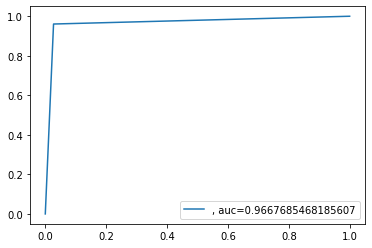

In [23]:
%time
Classifier1 = AdaBoostClassifier(random_state=42)
Classifier1.fit(x_train_pca, y_train_pca)
ypred_pca = Classifier1.predict(x_test_pca)
accuracy_pca =metrics.accuracy_score(y_test_pca, ypred_pca)
print("Accuracy for PCA is :", accuracy_pca * 100 , "%")
fpr_pca, tpr_pca, _ = metrics.roc_curve(y_test_pca,  ypred_pca)
auc_pca = metrics.roc_auc_score(y_test_pca, ypred_pca)
plt.plot(fpr_pca,tpr_pca,label=", auc="+str(auc_pca))
plt.legend(loc=4)
plt.show()

CPU times: user 0 ns, sys: 5 µs, total: 5 µs
Wall time: 10.3 µs
Accuracy for TSNE2 is : 94.16666666666667 %


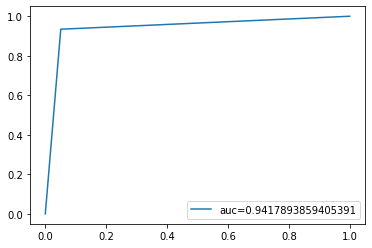

In [33]:
%time
Classifier2 = AdaBoostClassifier(random_state=42)
Classifier2.fit(x_train_tsne2, y_train_tsne2)
ypred_tsne2 = Classifier2.predict(x_test_tsne2)
accuracy_tsne2 = metrics.accuracy_score(y_test_tsne2, ypred_tsne2)
print("Accuracy for TSNE2 is :", accuracy_tsne2 * 100 , "%")
fpr_tsne2, tpr_tsne2, _ = metrics.roc_curve(y_test_tsne2,  ypred_tsne2)
auc_tsne2 = metrics.roc_auc_score(y_test_tsne2, ypred_tsne2)
plt.plot(fpr_tsne2,tpr_tsne2,label="auc="+str(auc_tsne2))
plt.legend(loc=4)
plt.show()

CPU times: user 16 µs, sys: 1 µs, total: 17 µs
Wall time: 22.2 µs
Accuracy for TSNE3 is : 93.33333333333333 %


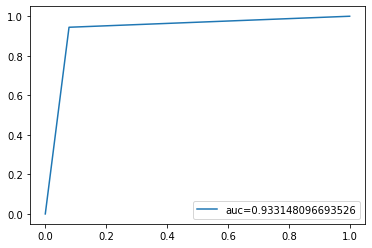

In [34]:
%time
Classifier3 = AdaBoostClassifier(random_state=42)
Classifier3.fit(x_train_tsne3, y_train_tsne3)
ypred_tsne3 = Classifier3.predict(x_test_tsne3)
accuracy_tsne3 = metrics.accuracy_score(y_test_tsne3, ypred_tsne3)
print("Accuracy for TSNE3 is :", accuracy_tsne3 * 100 , "%")
fpr_tsne3, tpr_tsne3, _ = metrics.roc_curve(y_test_tsne3,  ypred_tsne3)
auc_tsne3 = metrics.roc_auc_score(y_test_tsne3, ypred_tsne3)
plt.plot(fpr_tsne3,tpr_tsne3,label="auc="+str(auc_tsne3))
plt.legend(loc=4)
plt.show()

# **TSNE PLOT**

No handles with labels found to put in legend.


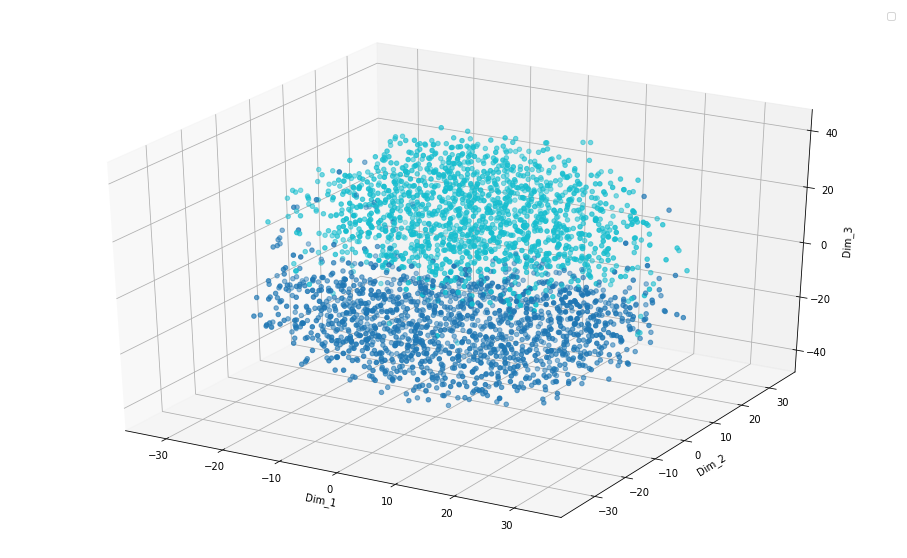

In [26]:
# Plot a TSNE
def plotTsne3(feats, labels):
    tsne_data = x_tsne3
    tsne_data_labs = np.vstack((tsne_data.T, labels)).T
    tsne_df = pd.DataFrame(data=tsne_data_labs, columns=('Dim_1', 'Dim_2', 'Dim_3', 'label'))
    np.random.seed(42)
    rndperm = np.random.permutation(tsne_df.shape[0])
    ax = plt.figure(figsize=(16,10)).gca(projection='3d')
    ax.scatter(
    xs=tsne_df.loc[rndperm,:]['Dim_1'], 
    ys=tsne_df.loc[rndperm,:]['Dim_2'], 
    zs=tsne_df.loc[rndperm,:]['Dim_3'], 
    c=tsne_df.loc[rndperm,:]['label'], 
    
    cmap='tab10'
    )
    ax.set_xlabel('Dim_1')
    ax.set_ylabel('Dim_2')
    ax.set_zlabel('Dim_3')
    ax.spines['bottom'].set_color('red')
    ax.legend()

    plt.show()
plotTsne3(featuresCD, labels)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


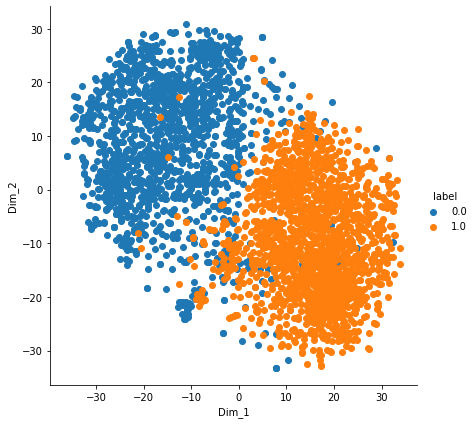

In [27]:
# Plot a TSNE
def plotTsne2(feats, labels):
    tsne_data =x_tsne2
    tsne_data_labs = np.vstack((tsne_data.T, labels)).T
    tsne_df = pd.DataFrame(data=tsne_data_labs, columns=('Dim_1', 'Dim_2', 'label'))
    sns.FacetGrid(tsne_df, hue='label', size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
    plt.show()
plotTsne2(featuresCD, labels)

# **AdaBoost from Scratch**

In [28]:
def compute_error(y, y_pred, w_i):
  eror = 0 
  for i in range(len(w_i)):
            if np.not_equal(y[i], y_pred[i]).astype(int) == 1 :
              eror = w_i[i] + eror
  return eror 

def compute_alpha(error):
  return 0.5 * np.log((1 - error) / error)

def update_weights(w_i, alpha, y, y_pred , error):
    for i in range(len(w_i)):
        if np.not_equal(y[i], y_pred[i]).astype(int) == 1 :
            b = +1 
        else :
            b = -1
        a = np.exp(alpha * b)
        zeta = 2 * ((error * (1 - error)) ** 0.5)
        w_i[i] = w_i[i] *(a / zeta)
    return w_i

In [29]:

# Define AdaBoost class
class AdaBoostclass:
    
    def __init__(self, N = 300):
        self.alphas = []
        self.hypothesis = []
        self.N = N # N : number of boosting rounds
        self.training_errors = []
        self.models = [None]*N
        base_estimator = DecisionTreeClassifier(max_depth=1)
        self.base_estimator = base_estimator

    def fit(self, x , y):
        '''
        ----------------------------------------------------
        Fit model
        x: x_train
        y: y_train
        ---------------------------------------------------
        '''
        N = self.N
        self.alphas = [] 
        self.training_errors = []

        for m in range(0, N):     
            # Set weights for current boosting iteration
            if m == 0:
                weights = np.ones(len(y)) * 1 / len(y)  # weights at first iteration must be 1/len(y)
            else:
                weights = update_weights(weights, n_alpha, y, y_pred, error_m) #update weights using update_weights function
            # for each iteration set new DecisionTreeClassifier(max_depth=1) and fit data , then predict with that
            hypothesis = clone(self.base_estimator).fit(x, y, sample_weight = weights).predict   
            y_pred = hypothesis(x)


            # Compute error using compute_error function
            error_m = compute_error(y, y_pred, weights)
            if (error_m < 0.5):
              self.training_errors.append(error_m)
              # Compute alpha using compute_alpha function
              n_alpha = compute_alpha(error_m)
              self.alphas.append(n_alpha)
              self.models[m] = (n_alpha , hypothesis , m)
            else: #if error > 0.5 abort loop
              continue




    def predict(self,x):
        '''
        ----------------------------------------------------
        predict model
        x: x_test
        y_pred: predicted by this function
        ---------------------------------------------------
        '''
        N = self.N
        hyp_list = [None]* N #for converting predicted amounts of hypothesis to list
        self.size = x.shape[0] #size of test data
        y_pred = [0]*self.size
        for n_alpha,hypothesis , m in self.models:
          hyp_list[m] =hypothesis(x).tolist() #hyp_list is list of predicted values ( 0 or 1 ) for each image in each hypothesis
          #for example hyp_list[0][500] is the value that the frist hypothesis predicted for date number 501
          for i, n in enumerate(hyp_list[m]): #in this section we replace   0.0 in hyp_list with -1 and 1.0 with 1
            if n == 0.0:
              hyp_list[m][i] = -1
            if n == 1.0:
              hyp_list[m][i] = 1
        alphas = self.alphas

        # get amount of predicted y 
        for j in range(self.size):
          for j2 in range(N):
            a = hyp_list[j2][j] * alphas[j2]
            y_pred[j] =  y_pred[j] + a

        # one hot encoder
        for i in range(len(y_pred)):
          if y_pred[i] > 0:
            y_pred[i] = 1
          else:
            y_pred[i] = 0
        return  y_pred



   

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
Accuracy for PCA is : 96.66666666666667 %


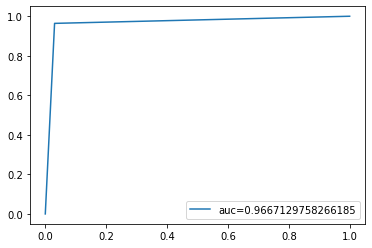

In [32]:
%time
adaclass_PCA = AdaBoostclass()
adaclass_PCA.fit(x_train_pca, y_train_pca)
y_predictionPCA = adaclass_PCA.predict(x_test_pca)
accuracy_p_PCA = accuracy_score(y_test_pca, y_predictionPCA)
print("Accuracy for PCA is :", accuracy_p_PCA * 100 , "%")
fpr_p_pca, tpr_p_pca, _ = metrics.roc_curve(y_test_pca,  y_predictionPCA)
auc_p_pca = metrics.roc_auc_score(y_test_pca, y_predictionPCA)
plt.plot(fpr_p_pca,tpr_p_pca,label="auc="+str(auc_p_pca))
plt.legend(loc=4)
plt.show()

CPU times: user 17 µs, sys: 0 ns, total: 17 µs
Wall time: 23.6 µs
Accuracy for TSNE2 is : 94.5 %


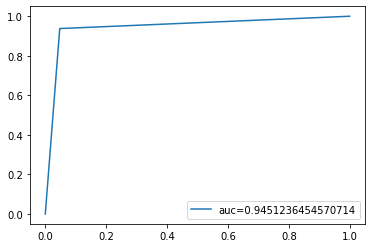

In [36]:
%time
adaclass_TSNE2 = AdaBoostclass()
adaclass_TSNE2.fit(x_train_tsne2, y_train_tsne2)
y_predictionTSNE2 = adaclass_TSNE2.predict(x_test_tsne2)
accuracy_p_TSNE2 = accuracy_score(y_test_tsne2, y_predictionTSNE2)
print("Accuracy for TSNE2 is :", accuracy_p_TSNE2 * 100 , "%")
fpr_p_tsne2, tpr_p_tsne2, _ = metrics.roc_curve(y_test_tsne2,  y_predictionTSNE2)
auc_p_tsne2 = metrics.roc_auc_score(y_test_tsne2, y_predictionTSNE2)
plt.plot(fpr_p_tsne2,tpr_p_tsne2,label="auc="+str(auc_p_tsne2))
plt.legend(loc=4)
plt.show()

CPU times: user 24 µs, sys: 1 µs, total: 25 µs
Wall time: 31.2 µs
Accuracy for TSNE3 is : 93.33333333333333 %


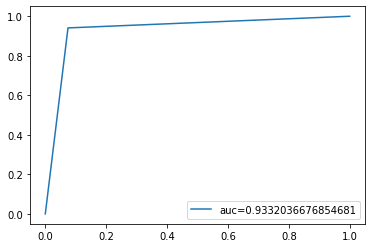

In [37]:
%time
adaclass_TSNE3 = AdaBoostclass()
adaclass_TSNE3.fit(x_train_tsne3, y_train_tsne3)
y_predictionTSNE3 = adaclass_TSNE3.predict(x_test_tsne3)
accuracy_p_TSNE3 = accuracy_score(y_test_tsne3, y_predictionTSNE3)
print("Accuracy for TSNE3 is :", accuracy_p_TSNE3 * 100 , "%")
fpr_p_tsne3, tpr_p_tsne3, _ = metrics.roc_curve(y_test_tsne3,  y_predictionTSNE3)
auc_p_tsne3 = metrics.roc_auc_score(y_test_tsne3, y_predictionTSNE3)
plt.plot(fpr_p_tsne3,tpr_p_tsne3,label="auc="+str(auc_p_tsne3))
plt.legend(loc=4)
plt.show()

# **LogisticRegression**

In [ ]:
features_Reg = featuresCD.numpy() 
x_train_Reg, x_test_Reg, y_train_Reg, y_test_Reg = train_test_split(features_Reg, labels, test_size=0.2, random_state=42)
Regressionclassifier = LogisticRegression(random_state=0).fit(x_train_Reg, y_train_Reg)
ypred_Reg = Regressionclassifier.predict(x_test_Reg)
LogisticRegression_accuracy = accuracy_score(y_test_Reg, ypred_Reg)

Accuracy for LogisticRegression is : 97.5 %


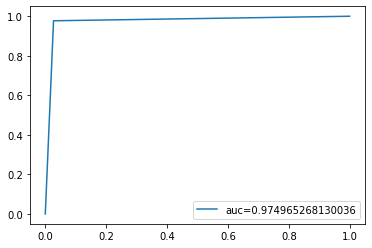

In [40]:
print("Accuracy for LogisticRegression is :", LogisticRegression_accuracy * 100 , "%")
fpr_reg, tpr_reg, _ = metrics.roc_curve(y_test_Reg,  ypred_Reg)
auc_reg = metrics.roc_auc_score(y_test_Reg, ypred_Reg)
plt.plot(fpr_reg,tpr_reg,label="auc="+str(auc_reg))
plt.legend(loc=4)
plt.show()

In [41]:
features_ADA = featuresCD.numpy() 
x_train, x_test, y_train, y_test = train_test_split(features_ADA, labels, test_size=0.2, random_state=42)

# **Compare AdaBoost from scratch vs AdaBoostClassifier when we use all features**

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs
Accuracy for all feautures using Adaboost library is : 95.5 %


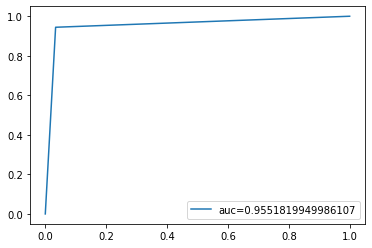

In [42]:
%time
Classifieradaboost = AdaBoostClassifier(random_state=42)
Classifieradaboost.fit(x_train, y_train)
ypredtotal = Classifieradaboost.predict(x_test)
accuracytotal = metrics.accuracy_score(y_test, ypredtotal)
print("Accuracy for all feautures using Adaboost library is :", accuracytotal * 100 , "%")
fpr_all, tpr_all, _ = metrics.roc_curve(y_test,  ypredtotal)
auc_all = metrics.roc_auc_score(y_test, ypredtotal)
plt.plot(fpr_all,tpr_all,label="auc="+str(auc_all))
plt.legend(loc=4)
plt.show()


CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 11.4 µs
Accuracy for all feautures using Adaboost scratch class is : 96.16666666666667 %


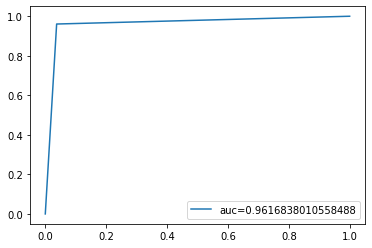

In [43]:
%time
Classifieradaboost_scratch = AdaBoostclass()
Classifieradaboost_scratch.fit(x_train, y_train)
ypredtotal_scratch = Classifieradaboost_scratch.predict(x_test)
accuracytotal_scratch = metrics.accuracy_score(y_test, ypredtotal_scratch)
print("Accuracy for all feautures using Adaboost scratch class is :", accuracytotal_scratch * 100 , "%")
fpr_all_p, tpr_all_p, _ = metrics.roc_curve(y_test,  ypredtotal_scratch)
auc_all_p = metrics.roc_auc_score(y_test, ypredtotal_scratch)
plt.plot(fpr_all_p,tpr_all_p,label="auc="+str(auc_all_p))
plt.legend(loc=4)
plt.show()  